<a href="https://colab.research.google.com/github/EslamWalid/Deep_learning_ITI/blob/main/ch5_CNN_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras import models , layers
import keras 

In [6]:
# LeNet Architecture from paper 
class LeNet(models.Sequential):
  def __init__(self,input_shape,nb_classes):
      super().__init__()
      self.add(layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=input_shape,padding='same'))
      self.add(layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))
      self.add(layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))
      self.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
      self.add(layers.Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))
      self.add(layers.Flatten())
      self.add(layers.Dense(84,activation="tanh"))
      self.add(layers.Dense(nb_classes,activation="softmax"))
      self.compile(loss=keras.losses.categorical_crossentropy,optimizer="SGD")
      self.summary()

In [7]:
from tensorflow.keras.models import Sequential
#from keras.layers import Dense, Activation,Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,Dense, Activation,Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np



In [8]:
np.random.seed(1000)
#intiate model
model=Sequential()
#AlexNet Arch
#1st conv layer
model.add(Conv2D(96,input_shape=(224,244,3),kernel_size=(11,11),strides=(4,4),padding='valid'))
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))

#2nd conv layer
model.add(Conv2D(256,kernel_size=(11,11),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))

#3rd conv layer
model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#4th conv layer
model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#5th conv layer
model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))

#passing it to full connected layer
model.add(Flatten())
#1st fully connected layer
model.add(Dense(4096,input_shape=(224*224*3,)))
model.add(Activation('relu'))
# add dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd fully connected layer
model.add(Dense(4096))
model.add(Activation('relu'))
# add dropout to prevent overfitting
model.add(Dropout(0.4))

#3rd fully connected layer
model.add(Dense(1000))
model.add(Activation('relu'))
# add dropout to prevent overfitting
model.add(Dropout(0.4))

#output layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()
#compile model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 59, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 54, 59, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 29, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 19, 256)       2973952   
                                                                 
 activation_10 (Activation)  (None, 17, 19, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 9, 256)        0         
 2D)                                                  

In [9]:
# VGG Arch
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

In [10]:
def vggBlock(layerIn,nFilter,nConv):
  # add conv layer 
  for _ in range(nConv):
    layerIn=Conv2D(nFilter,(3,3),padding='same', activation='relu')(layerIn)
  #add maxpooling
  layerIn= MaxPooling2D((2,2),strides=(2,2))(layerIn)
  return layerIn

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 128)     147584    
                                                             

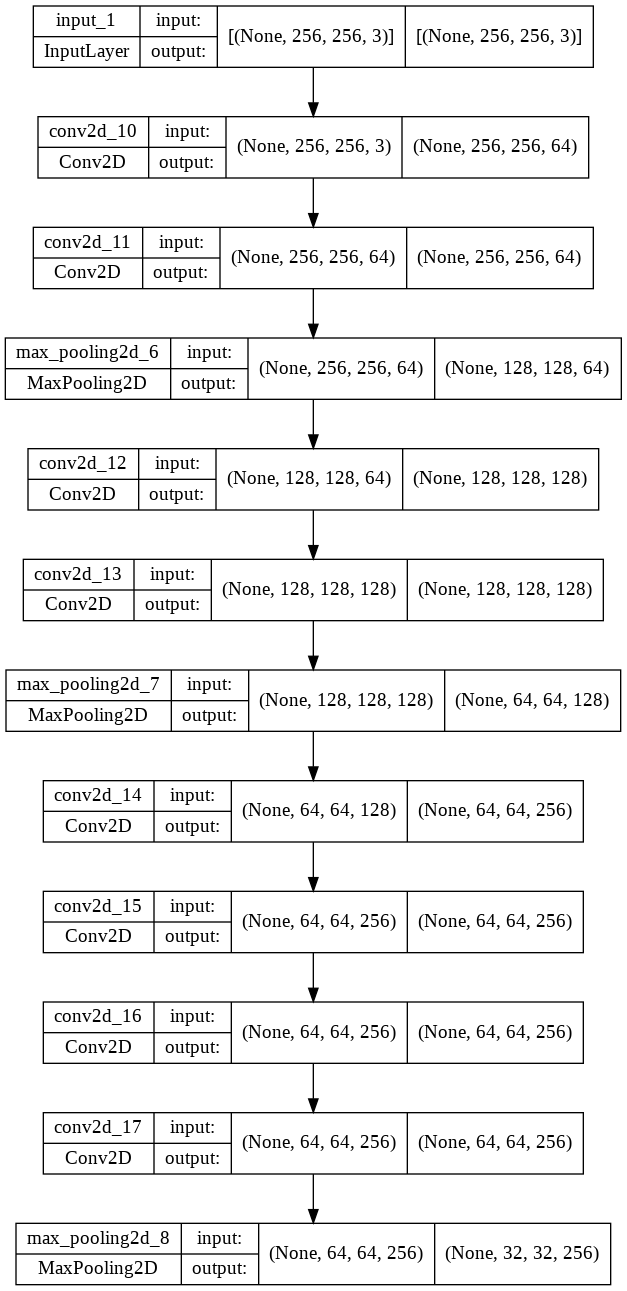

In [11]:
#define model input
visible=Input(shape=(256,256,3))
  #add vgg module
layer=vggBlock(visible,64,2)
layer=vggBlock(layer,128,2)
layer=vggBlock(layer,256,4)

  #creat model
model= Model(inputs=visible,outputs=layer)

model.summary()
   
plot_model(model,show_shapes=True,to_file='multiple_vgg_blocks.png')

In [15]:
from tensorflow.keras.layers import concatenate


In [16]:
#inception naive model
def naive_inception(layerIn,f1,f2,f3):
  #1x1 conv
  conv1=Conv2D(f1,(1,1),padding='same',activation='relu')(layerIn)

  conv2=Conv2D(f2,(3,3),padding='same',activation='relu')(layerIn)

  conv3=Conv2D(f3,(5,5),padding='same',activation='relu')(layerIn)

  # Maxpooling
  pool=MaxPooling2D((3,3),strides=(1,1),padding='same')(layerIn)

  #concatinate filters
  layerOut=concatenate([conv1,conv2,conv3,pool])

  return layerOut

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 256, 256, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 12  3584        ['input_3[0][0]']                
                                8)                                                          

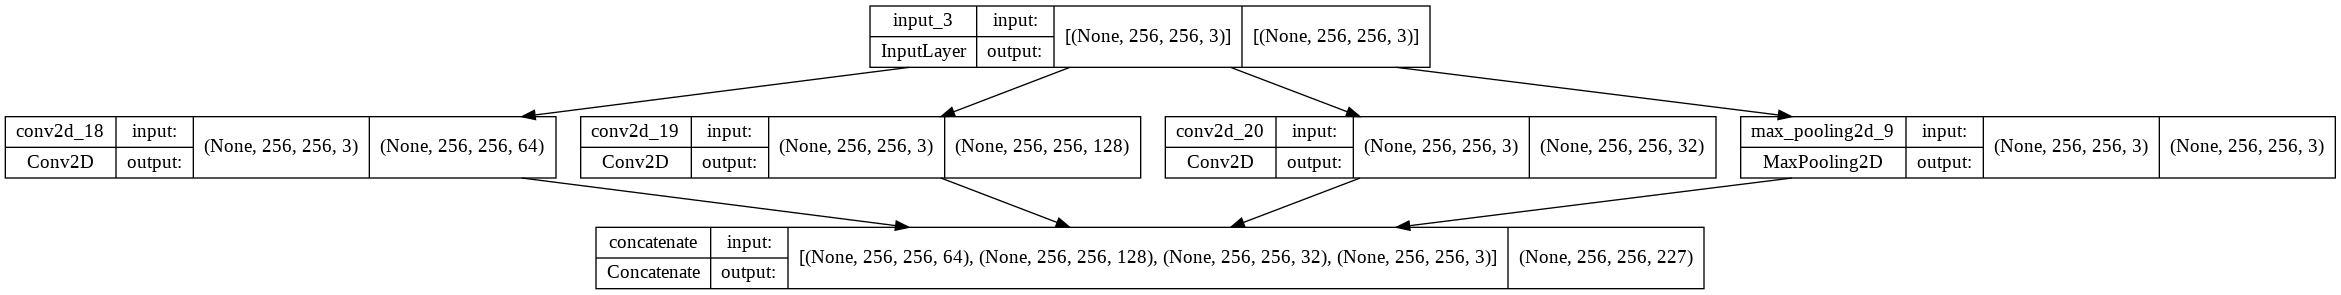

In [18]:
#define model input
visible=Input(shape=(256,256,3))
  #add vgg module
layer=naive_inception(visible,64,128,32)
#creat model
model= Model(inputs=visible,outputs=layer)

model.summary()
plot_model(model,show_shapes=True,to_file='naive_inception.png')

In [20]:
from tensorflow.keras.layers import add,Activation

In [31]:
# ResNet Arch
def Res_modul(layerIn,Nfilter):
  mergeInput=layerIn
  if layerIn.shape[-1] != Nfilter:
    mergeInput=Conv2D(Nfilter,(1,1),padding='same',activation='relu',kernel_initializer='he_normal')(layerIn)

  conv1=Conv2D(Nfilter,(3,3),padding='same',activation='relu',kernel_initializer='he_normal')(layerIn)
  conv2=Conv2D(Nfilter,(3,3),padding='same',activation='linear',kernel_initializer='he_normal')(conv1)

  layerOut=add([conv2,mergeInput])

  layerOut=Activation('relu')(layerOut)

  return layerOut



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_37 (Conv2D)             (None, 256, 256, 64  1792        ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_37[0][0]']              
                                )                                                           

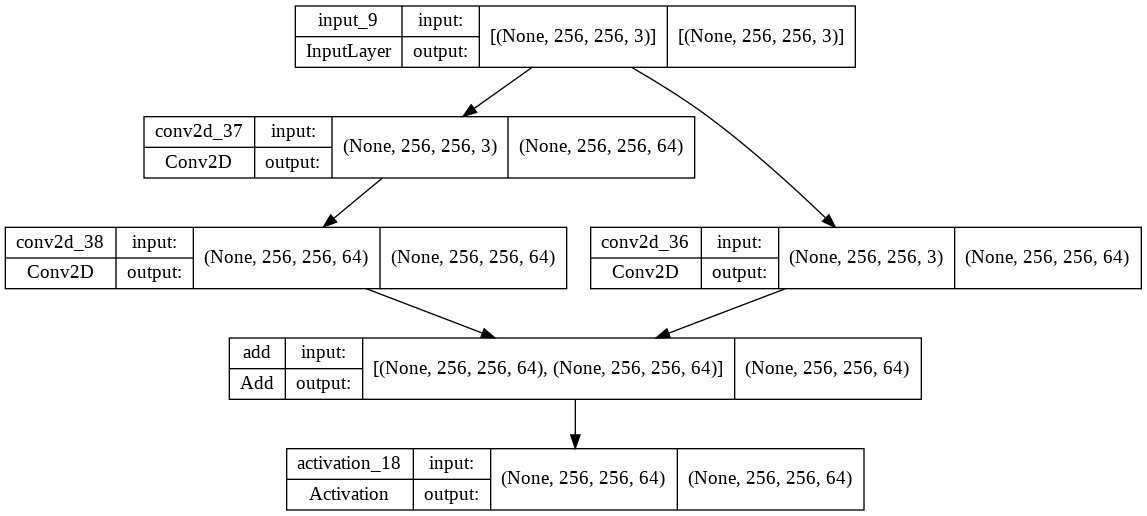

In [32]:
#define model input
visible=Input(shape=(256,256,3))
  #add vgg module
layer=Res_modul(visible,64)
#creat model
model= Model(inputs=visible,outputs=layer)

model.summary()
plot_model(model,show_shapes=True,to_file='Res_modul.png')

In [24]:
!pip install keras-rl2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 843 kB/s 


### Applying Image Classification with VGG16

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16

In [39]:
img =load_img('/content/mercides.jpg',target_size=(224,224))
img=img_to_array(img)
img=img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
#making the image prepared for model
img=preprocess_input(img)
#modeling
model=VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [50]:
#predication
yhat=model.predict(img)
#lable the predication
label=decode_predictions(yhat)
label[0][0]


('n04285008', 'sports_car', 0.4107098)

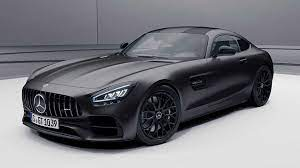

In [49]:
from IPython.display import Image
Image('/content/mercides.jpg')

In [45]:
label[0][0][1]


'sports_car'